In [1]:
from plotter_utils import *

# globals
model_name = 'gpt-3.5-turbo-0613'
cpd_dataset_folder = 'datasets/cpd_debates'
cpd_raw_debates_folder = f'{cpd_dataset_folder}/cpd_debates_raw'
cpd_slices_folder = f'{cpd_dataset_folder}/cpd_debates_slices'
cpd_slices_texts_folder = f'{cpd_dataset_folder}/cpd_debates_slices_text'
cpd_measurements_folder = f'{cpd_dataset_folder}/cpd_debates_measurements'
plots_folder = 'plots'
observable_ensemble_plots_folder = f'{plots_folder}/observable_ensemble_plots'

report_latex_folder = 'report/sec/code_info/'

debates_d, slices_d, paragraphs_d = load_dataset()
speaker_measurements = load_speaker_measurements()
slice_speaker_base_observables = load_slice_and_measured_observables(slices_d)

In [2]:
# load different ensembles
ensembles = []
for group, val in speaker_observables_groups.items():
    if len(val)>1:
        names = [o.detailed_name for o in val]
        ensembles.append((group, names))

# load df
SS_SSO = speaker_measurements['WS_SS_SSO_measurements']
SS_SSO_df = prepare_raw_speaker_observables(slice_speaker_base_observables, SS_SSO)

SS_SSO_df = transform_str_categories_to_flags(SS_SSO_df, 'speaker_party')
SS_SSO_df = transform_str_categories_to_flags(SS_SSO_df, 'debate_elected_party')

SS_SSO_candidates_only_df = SS_SSO_df[SS_SSO_df['speaker_party_is_UNKNOWN'] == 0]
SS_SSO_candidates_only_df = SS_SSO_candidates_only_df.drop(columns=['speaker_party_is_UNKNOWN'])

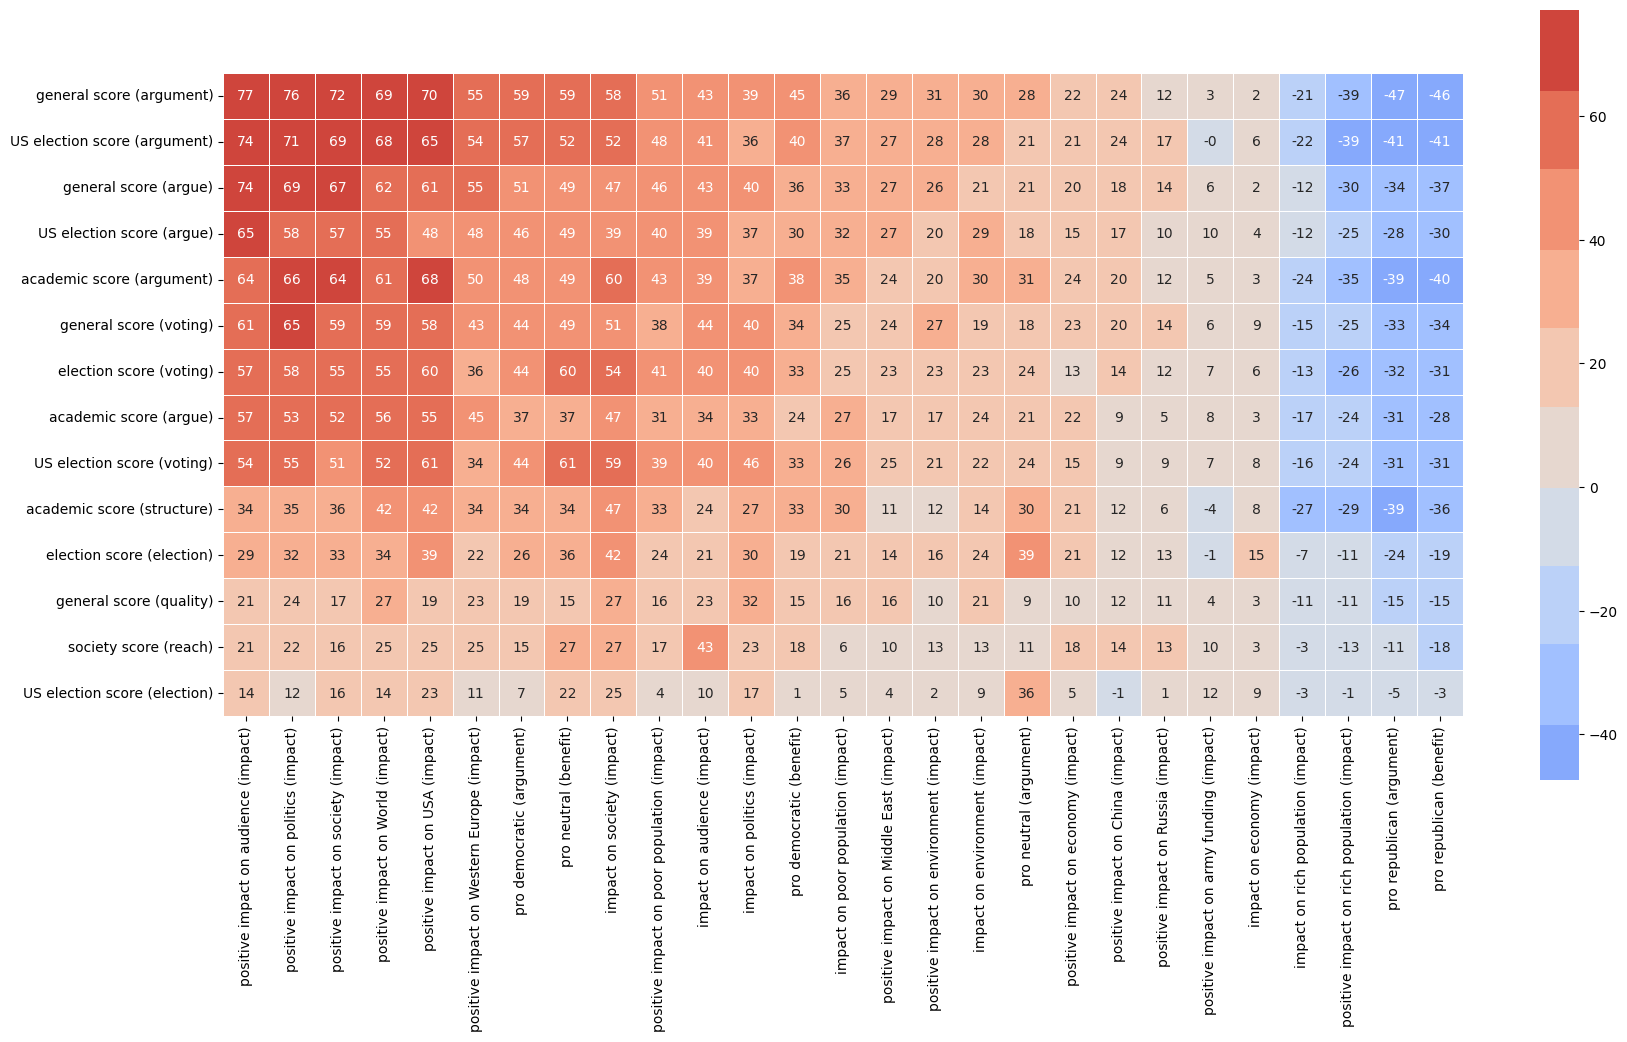

In [3]:
# make a correlation plot of all different score types against the result observables
corr_result_pred = SS_SSO_candidates_only_df.select_dtypes(exclude=['object']).corr()
corr_result_pred = corr_result_pred.loc[corr_result_pred.index.isin(set([o.detailed_name for o in result_observables.values() if 'score' in o.name]))]
# corr_result_pred = corr_result_pred[corr_result_pred.columns.intersection(set([o.detailed_name for o in predictor_observables.values()]))]
corr_result_pred = corr_result_pred[corr_result_pred.columns.intersection(set([o.detailed_name for o in result_observables.values() if 'score' not in o.name]))]

corr_result_pred = corr_result_pred.sort_values(by=['general score (argue)'], axis=1, ascending=False)
# sort by values in first column
corr_result_pred = corr_result_pred.sort_values(by=[corr_result_pred.columns[0]], ascending=False)

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("coolwarm", 12)

sns.heatmap(corr_result_pred*100, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.0f')
plt.show()

# # heatmap of correlations
# corr_result_pred = corr.copy()
# # make rows only contain observables in result_observables
# corr_result_pred = corr_result_pred.loc[corr_result_pred.index.isin(set([o.name for o in result_observables.values()]))] 
# # make columns only contain observables in predictor_observables
# corr_result_pred = corr_result_pred[corr_result_pred.columns.intersection(set([o.name for o in predictor_observables.values()]))]

# corr_result_pred = corr_result_pred.sort_values(by=['score'], axis=1, ascending=False)
# # sort by values in first column
# corr_result_pred = corr_result_pred.sort_values(by=[corr_result_pred.columns[0]], ascending=False)

# f, ax = plt.subplots(figsize=(20, 20))
# cmap = sns.color_palette("coolwarm", 12)

# sns.heatmap(corr_result_pred*100, cmap=cmap, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.0f')

# # plt.title(f'Correlation between speaker and slice observables\n \
# # for presidential and vice presidential candidates only\n \
# # and for {len(SS_SSO_grouped_candidates_only_df)} slices * speakers_per_slice\n \
# # and for a total amount of {n_raw_observables} observables grouped into {n_grouped_observables}\n', fontsize=20)
# plt.show()

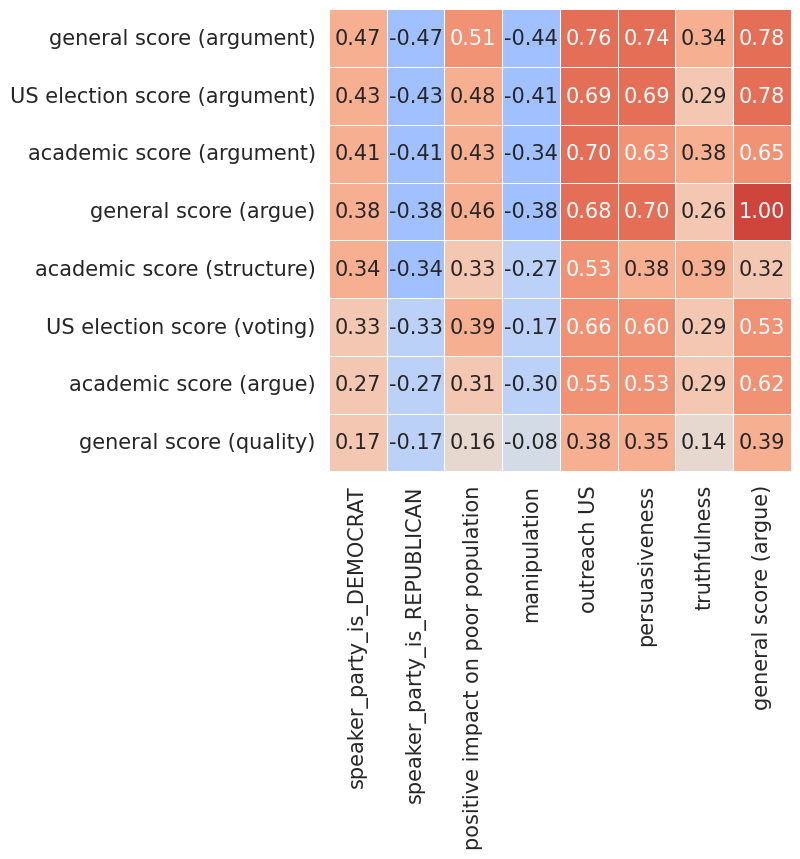

In [22]:
# make a correlation plot of all different score types against the result observables
corr_result_pred = SS_SSO_candidates_only_df.select_dtypes(exclude=['object'])

# combine all values that are not a score
for key, detailed in speaker_observables_groups.items():
    if 'score' in key:
        continue

    detailed_names = [o.detailed_name for o in detailed]

    corr_result_pred[key] = corr_result_pred[detailed_names].mean(axis=1)

corr_result_pred = corr_result_pred.corr()

corr_result_pred = corr_result_pred.loc[corr_result_pred.index.isin(set([o.detailed_name for o in result_observables.values() if 'score' in o.name]))]
# corr_result_pred = corr_result_pred[corr_result_pred.columns.intersection(set([o.detailed_name for o in result_observables.values() if 'score' not in o.name]))]

targets = ['speaker_party_is_DEMOCRAT', 'speaker_party_is_REPUBLICAN', 'positive impact on poor population', 'manipulation', 'outreach US', 'persuasiveness', 'truthfulness', 'general score (argue)']
corr_result_pred = corr_result_pred[targets]

rows = ['general score (argument)', 'US election score (argument)', 'academic score (argument)', 'general score (argue)', 'academic score (structure)', 'academic score (argue)', 'US election score (voting)', 'general score (quality)']
corr_result_pred = corr_result_pred.loc[rows]

# corr_result_pred = corr_result_pred.sort_values(by=['general score (argue)'], axis=1, ascending=False)
# sort by values in first column
corr_result_pred = corr_result_pred.sort_values(by=[corr_result_pred.columns[0]], ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.color_palette("coolwarm", 12)

# increase size of labels in heatmap cells
sns.set(font_scale=1.25)
sns.heatmap(corr_result_pred, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

# # change angle to 45 degrees
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)

# remove color bar
ax.collections[0].colorbar.remove()

# incrase size of labels on axes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

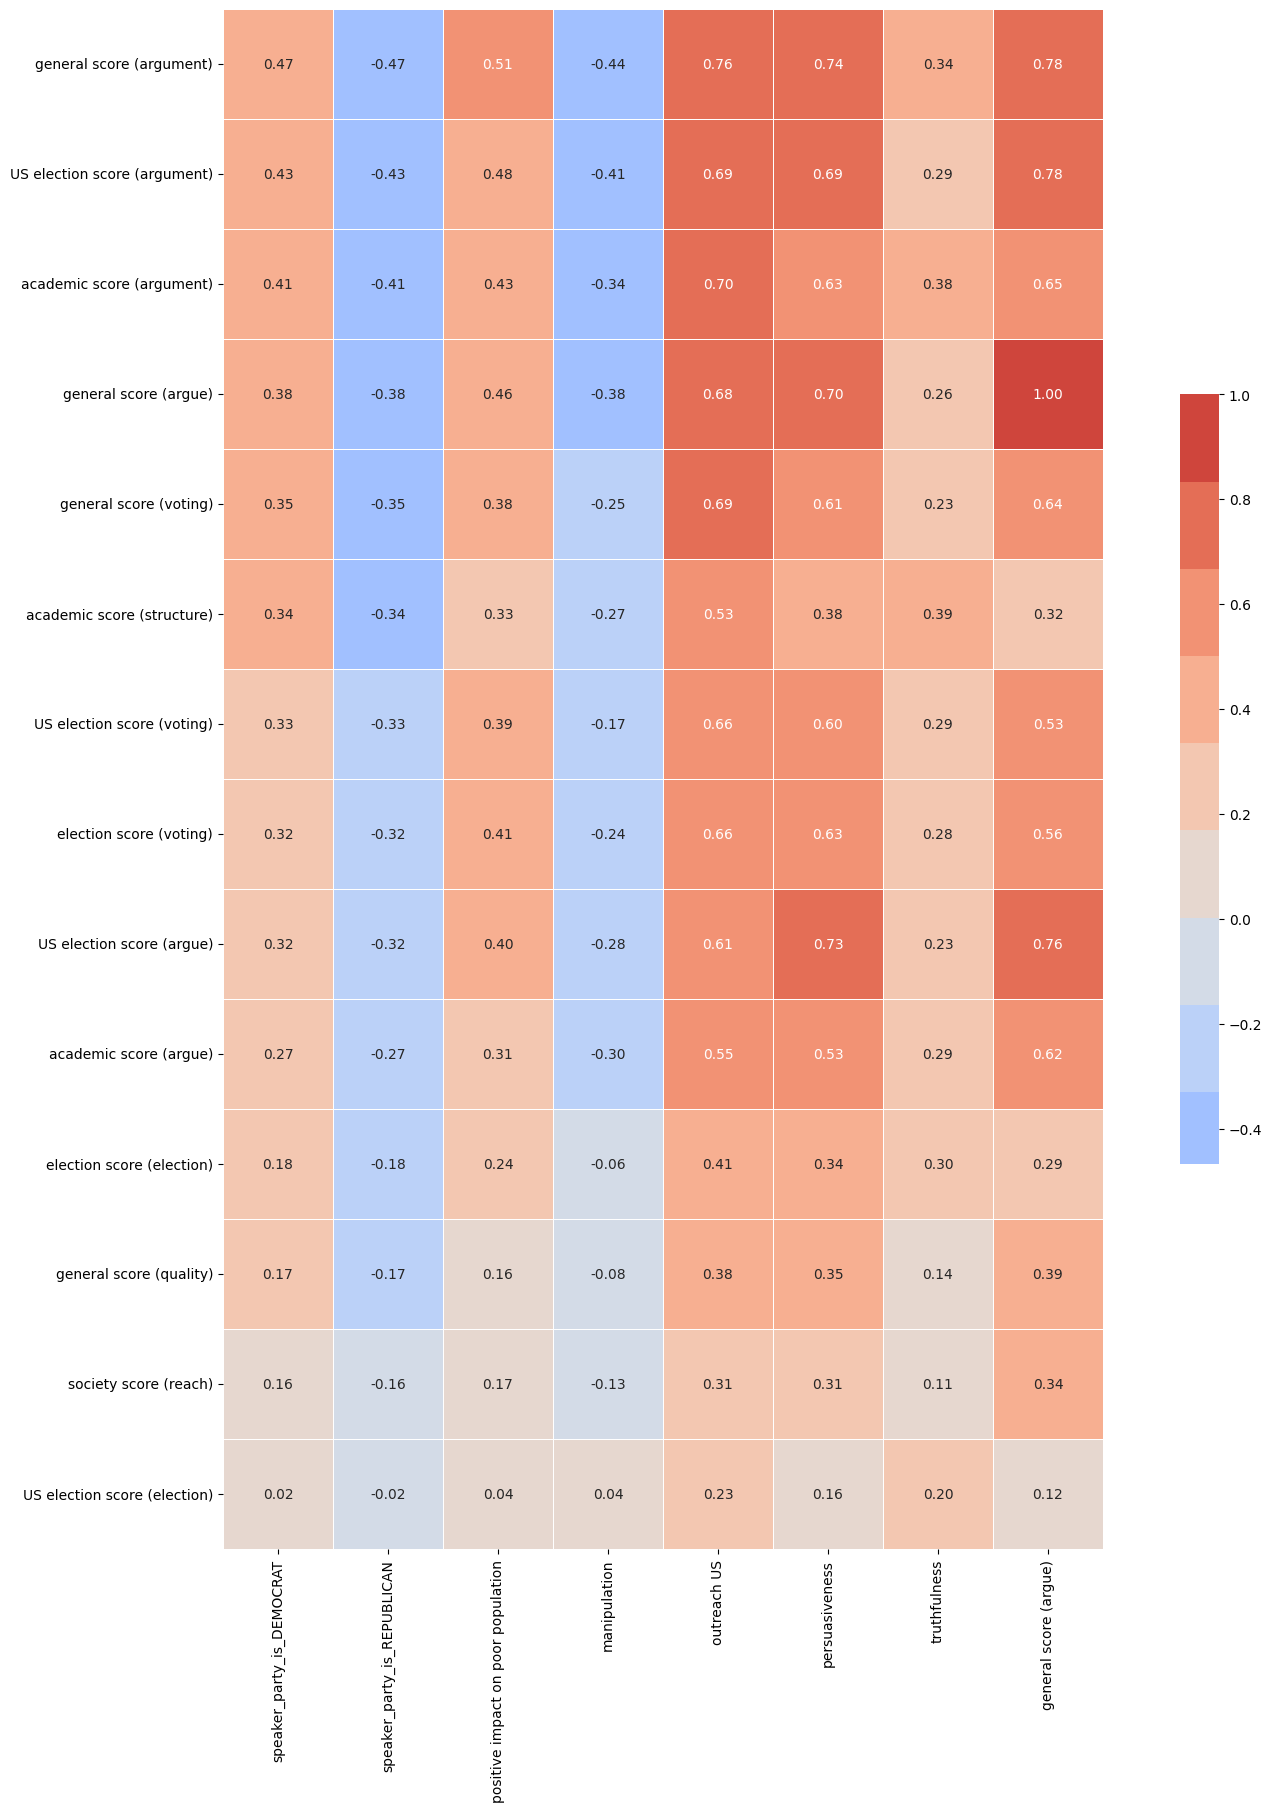

In [5]:
# make a correlation plot of all different score types against the result observables
corr_result_pred = SS_SSO_candidates_only_df.select_dtypes(exclude=['object'])

# combine all values that are not a score
for key, detailed in speaker_observables_groups.items():
    if 'score' in key:
        continue

    detailed_names = [o.detailed_name for o in detailed]

    corr_result_pred[key] = corr_result_pred[detailed_names].mean(axis=1)

corr_result_pred = corr_result_pred.corr()

corr_result_pred = corr_result_pred.loc[corr_result_pred.index.isin(set([o.detailed_name for o in result_observables.values() if 'score' in o.name]))]
# corr_result_pred = corr_result_pred[corr_result_pred.columns.intersection(set([o.detailed_name for o in result_observables.values() if 'score' not in o.name]))]

targets = ['speaker_party_is_DEMOCRAT', 'speaker_party_is_REPUBLICAN', 'positive impact on poor population', 'manipulation', 'outreach US', 'persuasiveness', 'truthfulness', 'general score (argue)']
corr_result_pred = corr_result_pred[targets]

# corr_result_pred = corr_result_pred.sort_values(by=['general score (argue)'], axis=1, ascending=False)
# sort by values in first column
corr_result_pred = corr_result_pred.sort_values(by=[corr_result_pred.columns[0]], ascending=False)

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("coolwarm", 12)

sns.heatmap(corr_result_pred, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
plt.show()